# Visualização das análises de sensibilidade
- Notebook dedidado à leitura de arquivos .json resultantes das análises de sensibilidade para cada um dos algoritmos de otimização

In [1]:
# Importa pacotes
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_pso_sens = read_json('simulations/pso_sensitivity.json')

In [3]:
dict_pso_sens[0].keys()

dict_keys(['global_factor', 'local_factor', 'v_max', 'fitness_calls', 'best_ind_list', 'avg_ind_list', 'best_solutions', 'total_time'])

In [4]:
best_ind_array = np.array(dict_pso_sens[1]['best_ind_list'])
avg_ind_array = np.array(dict_pso_sens[1]['avg_ind_list'])

indice = best_ind_array.argmax()
best_ind = best_ind_array[indice]
avg_ind = avg_ind_array[indice]
print(indice, best_ind, avg_ind)

49 0.6487439681624195 0.507705814160825


In [5]:
class SensVisualizer():
    def __init__(self, file_path:str, parameters:list):
        self.parameters = parameters
        with open(file_path, 'r') as file:
            self.sens_list = json.load(file)
    
    def print_keys(self):
        print(self.sens_list[0].keys())

    def process_json(self):
        processed_list = []
        for sens_dict in self.sens_list:
            dict_filtered = {}
            for parameter in self.parameters:
                dict_filtered[parameter] = sens_dict[parameter]
            if sens_dict['best_ind_list'] != 'ERRO':
                best_ind_array = np.array(sens_dict['best_ind_list'])
                avg_ind_array = np.array(sens_dict['avg_ind_list'])
                max_best_ind_value = best_ind_array.max()
                indices_of_max_best_ind = np.where(best_ind_array == max_best_ind_value)[0]

                if len(indices_of_max_best_ind) > 1:
                    # Selecionar a linha com o maior avg_ind entre as que têm o melhor best_ind
                    max_avg_ind = -np.inf
                    chosen_index = -1
                    for index in indices_of_max_best_ind:
                        if avg_ind_array[index] > max_avg_ind:
                            max_avg_ind = avg_ind_array[index]
                            chosen_index = index
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]
                else:
                    # Caso de um único máximo
                    chosen_index = indices_of_max_best_ind[0]
                    best_ind = best_ind_array[chosen_index]
                    avg_ind = avg_ind_array[chosen_index]

                dict_filtered['best_ind'] = best_ind
                dict_filtered['avg_ind'] = avg_ind
                dict_filtered['fitness_calls'] = sens_dict['fitness_calls'][chosen_index]
                dict_filtered['total_time'] = sens_dict['total_time']

            else:
                dict_filtered['best_ind'] = 0
                dict_filtered['avg_ind'] = 0
                dict_filtered['fitness_calls'] = 0
                dict_filtered['total_time'] = 0

            processed_list.append(dict_filtered)

        self.df_sens = pd.DataFrame(processed_list)

    def get_inds(self):
        self.df_best_ind = self.df_sens.loc[self.df_sens['best_ind'] == self.df_sens['best_ind'].max()]
        self.df_avg_ind = self.df_sens.loc[self.df_sens['avg_ind'] == self.df_sens['avg_ind'].max()]
    
    def display_all(self):
        self.process_json()
        self.get_inds()
        print("Tabela de sensibilidade:")
        display(self.df_sens)

        print("Melhor indivíduo")
        display(self.df_best_ind)

        print("Melhor indivíduo médio")
        display(self.df_avg_ind)

        dict_params = {}
        for parameter in self.parameters:
            dict_params[parameter] = self.df_sens[parameter].unique()
        print("Parâmetros")
        print(dict_params)
        
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.process_json()


# PSO

In [6]:
path = 'simulations/pso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max']
viz_pso = SensVisualizer(file_path=path, parameters=parameters)
viz_pso.display_all()
df_sens_pso = viz_pso.df_sens

df_sens_pso_csv = df_sens_pso.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_pso_csv['best_ind'] = df_sens_pso_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['avg_ind'] = df_sens_pso_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_pso_csv['fitness_calls'] = df_sens_pso_csv['fitness_calls'].astype(int)
df_sens_pso_csv['total_time'] = df_sens_pso_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_pso_csv.to_csv('processed_tables/pso_sensitivity.csv', index=False)


Tabela de sensibilidade:


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.648307,0.518163,47.0,102.678164
1,3.5,1.0,3.25,0.648744,0.507706,50.0,107.940060
2,3.5,1.0,5.50,0.593491,0.375793,1.0,123.004239
3,3.5,1.0,7.75,0.593491,0.375793,1.0,125.465086
4,3.5,1.0,10.00,0.626616,0.489710,13.0,119.913148
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.635384,0.507626,30.0,108.980605
106,6.0,6.0,3.25,0.632197,0.511434,34.0,109.493244
107,6.0,6.0,5.50,0.634671,0.511403,35.0,109.780444
108,6.0,6.0,7.75,0.635345,0.511345,50.0,110.572838


Melhor indivíduo


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
6,4.75,1.0,3.25,0.648782,0.608127,50.0,103.80795


Melhor indivíduo médio


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
5,4.75,1.0,1.0,0.646797,0.646648,50.0,103.934887


Parâmetros
{'global_factor': array([3.5 , 4.75, 6.  , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 , 4.75, 6.  ]), 'v_max': array([ 1.  ,  3.25,  5.5 ,  7.75, 10.  ])}


,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.648307,0.518163,47.0,102.678164
1,3.5,1.0,3.25,0.648744,0.507706,50.0,107.940060
2,3.5,1.0,5.50,0.593491,0.375793,1.0,123.004239
3,3.5,1.0,7.75,0.593491,0.375793,1.0,125.465086
4,3.5,1.0,10.00,0.626616,0.489710,13.0,119.913148
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.635384,0.507626,30.0,108.980605
106,6.0,6.0,3.25,0.632197,0.511434,34.0,109.493244
107,6.0,6.0,5.50,0.634671,0.511403,35.0,109.780444
108,6.0,6.0,7.75,0.635345,0.511345,50.0,110.572838


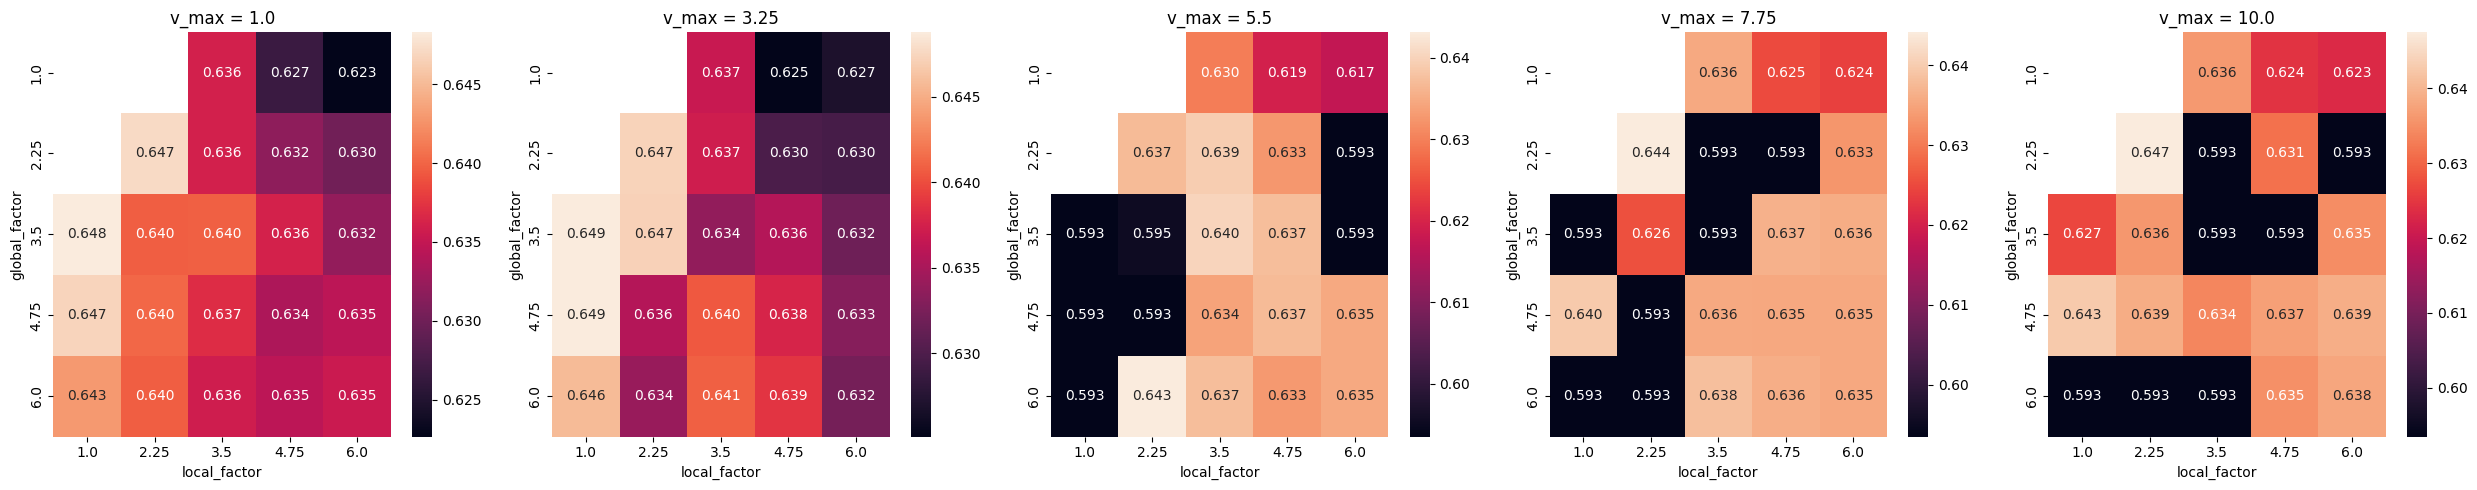

In [7]:
def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)
    fig, axes = plt.subplots(1, numero_plots, figsize=(25, 5))  # Ajuste o tamanho conforme necessário
    iter_counter = 0
    for z in list_z:
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[iter_counter], annot=True, fmt=".3f")
        axes[iter_counter].set_title(f'{nom_z} = {z}')

        iter_counter += 1
    # Ajuste o espaçamento entre os subplots
    plt.tight_layout()

    # Exiba o gráfico
    plt.show()


plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')

,global_factor,local_factor,v_max,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,1.00,0.648307,0.518163,47.0,102.678164
1,3.5,1.0,3.25,0.648744,0.507706,50.0,107.940060
2,3.5,1.0,5.50,0.593491,0.375793,1.0,123.004239
3,3.5,1.0,7.75,0.593491,0.375793,1.0,125.465086
4,3.5,1.0,10.00,0.626616,0.489710,13.0,119.913148
...,...,...,...,...,...,...,...
105,6.0,6.0,1.00,0.635384,0.507626,30.0,108.980605
106,6.0,6.0,3.25,0.632197,0.511434,34.0,109.493244
107,6.0,6.0,5.50,0.634671,0.511403,35.0,109.780444
108,6.0,6.0,7.75,0.635345,0.511345,50.0,110.572838


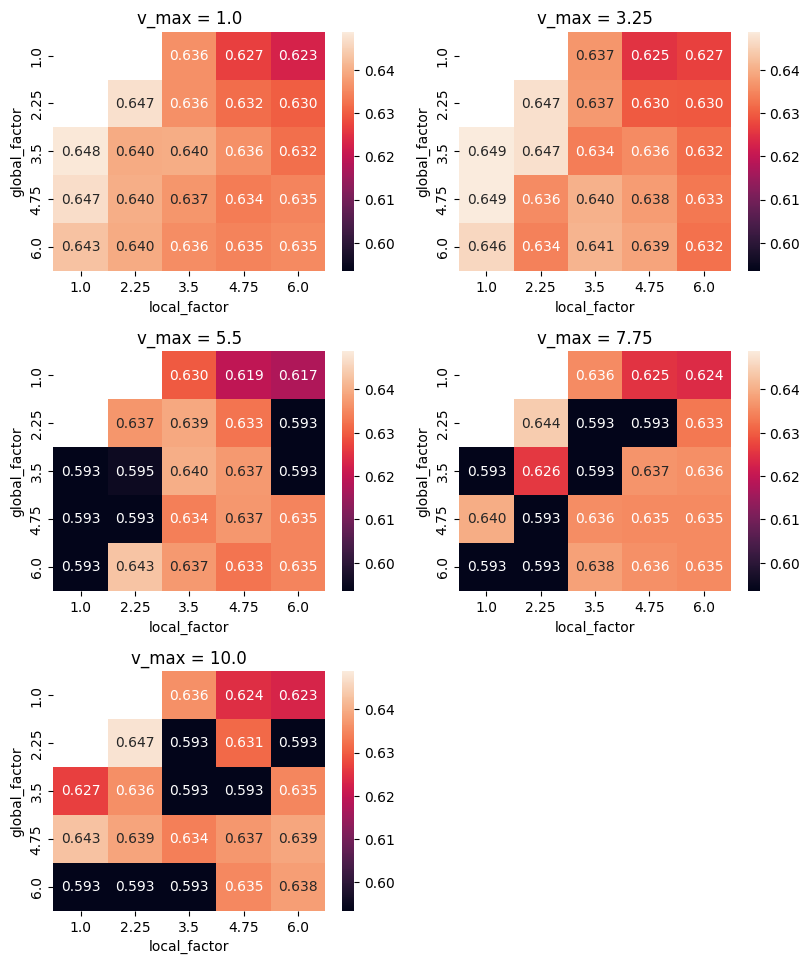

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

def plot_graph_pso(df, nom_x, nom_y, nom_z):
    list_graficos = []
    display(df)
    list_z = df[nom_z].unique()

    numero_plots = len(list_z)

    # Definindo o número de linhas e colunas
    cols = 2  # Máximo de 3 plots por linha
    rows = 3  # Duas linhas para acomodar todos os 5 plots

    # Calculando a largura e a altura da figura
    largura_figura = 21  # Largura total em cm
    altura_figura = (29.7 / rows) * (numero_plots / cols)  # Altura proporcional

    # Criando a figura com o layout ajustado
    fig, axes = plt.subplots(rows, cols, figsize=(largura_figura / 2.54, altura_figura / 2.54))

    # Encontra o maior e o menor valor de fitness para padronizar a cor da escala no plot do heatmap
    vmin = df['best_ind'].min()
    vmax = df['best_ind'].max()
    

    # Preenchendo cada subplot
    for i, z in enumerate(list_z):
        row, col = divmod(i, cols)
        eixo_x = df.loc[df[nom_z] == z, nom_x]
        eixo_y = df.loc[df[nom_z] == z, nom_y]
        fitness = df.loc[df[nom_z] == z, 'best_ind']
        dict_grafico = {
            nom_x: eixo_x,
            nom_y: eixo_y,
            nom_z: z,
            'fitness': fitness
        }
        list_graficos.append(dict_grafico)

        df_filtrado = pd.DataFrame(dict_grafico)
        df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
        sns.heatmap(data=df_pivot, ax=axes[row, col], annot=True, fmt=".3f", vmin=vmin, vmax=vmax)
        axes[row, col].set_title(f'{nom_z} = {z}')

    # Ajustando espaçamento e removendo subplots não utilizados
    for ax in axes.flat[numero_plots:]:
        ax.set_visible(False)

    plt.tight_layout()
    plt.show()

# Exemplo de uso
plot_graph_pso(df_sens_pso, 'global_factor', 'local_factor', 'v_max')


- Resultados parecem ser melhores na diagonal superior de global_factor 3.5 a 1.
- Valores do topo nao existem por conta da restrição global_factor + local_factor > 2

# Evolução Diferencial

In [9]:
path = 'simulations/de_sensitivity.json'
parameters = ['mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
# ERREI NO NOME 
# global_factor = mutation_rate 
# local_factor = crossover_rate
viz.display_all()
#rename_dict = {'global_factor': 'mutation_rate', 'local_factor': 'crossover_rate'}
#viz.df_sens.rename(columns=rename_dict, inplace=True)
df_sens_de = viz.df_sens


Tabela de sensibilidade:


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,0.1,0.1,0.619430,0.472321,98.0,264.577937
1,0.2,0.1,0.628694,0.493266,100.0,259.659864
2,0.3,0.1,0.626659,0.499431,98.0,259.242042
3,0.4,0.1,0.615729,0.500195,98.0,261.033894
4,0.5,0.1,0.625571,0.500407,98.0,264.412476
...,...,...,...,...,...,...
95,0.6,1.0,0.633081,0.482635,100.0,261.172298
96,0.7,1.0,0.623796,0.483809,100.0,259.001712
97,0.8,1.0,0.632133,0.484863,100.0,259.349250
98,0.9,1.0,0.617901,0.485610,100.0,258.428419


Melhor indivíduo


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
89,1.0,0.9,0.640763,0.495008,100.0,257.322936


Melhor indivíduo médio


,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
58,0.9,0.6,0.63709,0.500794,100.0,263.449596


Parâmetros
{'mutation_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]), 'crossover_rate': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])}


In [10]:
df_sens_de_csv = df_sens_de.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_de_csv['best_ind'] = df_sens_de_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['avg_ind'] = df_sens_de_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_de_csv['fitness_calls'] = df_sens_de_csv['fitness_calls'].astype(int)
df_sens_de_csv['total_time'] = df_sens_de_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_de_csv['crossover_rate'] = df_sens_de_csv['crossover_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv['mutation_rate'] = df_sens_de_csv['mutation_rate'].apply(lambda x: round(x, 1))
df_sens_de_csv.to_csv('processed_tables/de_sensitivity.csv', index=False)



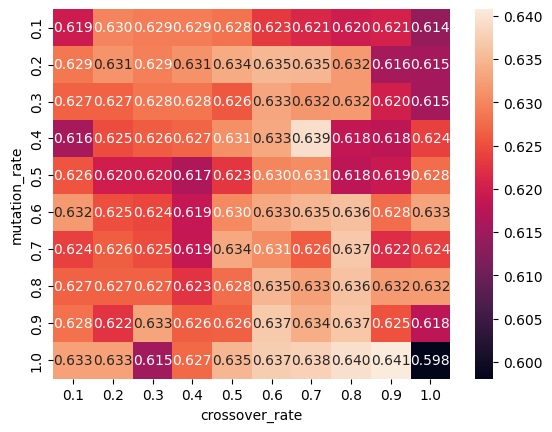

In [11]:
def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")


plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')

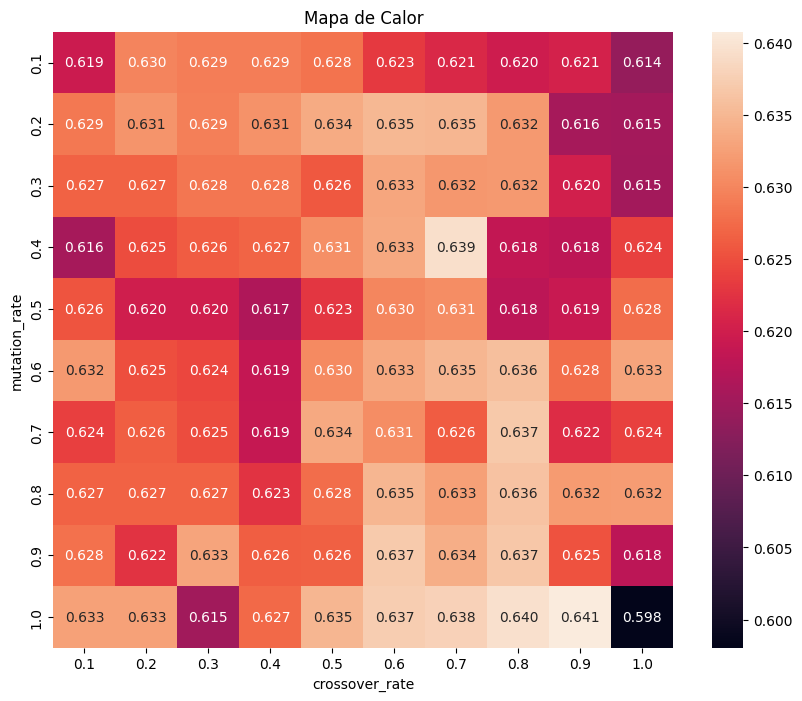

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

def plot_graph_de(df, nom_x, nom_y):

    eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: eixo_x,
        nom_y: eixo_y,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])

    # Ajustar o tamanho da figura para aumentar os quadrados
    plt.figure(figsize=(10, 8))  # Ajuste os valores conforme necessário
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")

    # Ajustar outros aspectos da visualização aqui, se necessário
    plt.title("Mapa de Calor")
    plt.ylabel(nom_x)
    plt.xlabel(nom_y)

    plt.show()

# Exemplo de chamada da função (comente ou ajuste conforme seus dados)
plot_graph_de(df_sens_de, 'mutation_rate', 'crossover_rate')


- Crossover rate de melhor desempenenho é 0.9 conforme referênciia

# CMA-ES

In [13]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()

Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,1,0.20,0.5,0.5,3.0,113.424928
1,2,0.20,0.5,0.5,3.0,111.901731
2,3,0.20,0.5,0.5,3.0,109.285968
3,4,0.20,0.5,0.5,3.0,109.240418
4,5,0.20,0.5,0.5,3.0,108.958304
...,...,...,...,...,...,...
95,10,0.75,0.5,0.5,4.0,100.870878
96,20,0.75,0.5,0.5,4.0,102.445391
97,100,0.75,0.5,0.5,4.0,104.296146
98,200,0.75,0.5,0.5,4.0,103.933112


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
74,5,0.65,0.644834,0.585054,50.0,99.625921


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
50,1,0.55,0.643503,0.643503,40.0,100.521553


Parâmetros
{'mi': array([  1,   2,   3,   4,   5,  10,  20, 100, 200, 300]), 'sigma': array([0.2 , 0.25, 0.3 , 0.35, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])}


# DEPSO

In [14]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()
df_sens_depso = viz.df_sens

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,5.5,0.2,0.5,0.5,0.500000,39.0,243.981200
1,3.5,1.0,5.5,0.2,0.7,0.5,0.500000,39.0,244.143023
2,3.5,1.0,5.5,0.2,0.9,0.5,0.500000,39.0,243.969531
3,3.5,1.0,5.5,0.2,1.0,0.5,0.500000,39.0,244.689338
4,3.5,1.0,5.5,0.4,0.5,0.5,0.500000,39.0,243.516384
...,...,...,...,...,...,...,...,...,...
283,3.5,3.5,10.0,0.6,1.0,0.5,0.500000,61.0,250.792300
284,3.5,3.5,10.0,0.8,0.5,0.5,0.499625,61.0,254.763209
285,3.5,3.5,10.0,0.8,0.7,0.5,0.499625,61.0,253.491396
286,3.5,3.5,10.0,0.8,0.9,0.5,0.500000,79.0,252.127671


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
111,3.5,2.25,5.5,0.8,1.0,0.649935,0.542295,101.0,231.413352


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
99,3.5,2.25,5.5,0.2,1.0,0.649506,0.620721,103.0,228.139822


Parâmetros
{'global_factor': array([3.5 , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 ]), 'v_max': array([ 5.5 ,  7.75, 10.  ]), 'mutation_rate': array([0.2, 0.4, 0.6, 0.8]), 'crossover_rate': array([0.5, 0.7, 0.9, 1. ])}


In [15]:
df_sens_depso = df_sens_depso.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_depso['best_ind'] = df_sens_depso['best_ind'].apply(lambda x: round(x, 3))
df_sens_depso['avg_ind'] = df_sens_depso['avg_ind'].apply(lambda x: round(x, 3))
df_sens_depso['fitness_calls'] = df_sens_depso['fitness_calls'].astype(int)
df_sens_depso['total_time'] = df_sens_depso['total_time'].apply(lambda x: round(x, 3))
df_sens_depso['crossover_rate'] = df_sens_depso['crossover_rate'].apply(lambda x: round(x, 1))
df_sens_depso['mutation_rate'] = df_sens_depso['mutation_rate'].apply(lambda x: round(x, 1))
df_sens_depso['global_factor'] = df_sens_depso['global_factor'].apply(lambda x: round(x, 2))
df_sens_depso['local_factor'] = df_sens_depso['local_factor'].apply(lambda x: round(x, 2))
df_sens_depso['v_max'] = df_sens_depso['v_max'].apply(lambda x: round(x, 2))

df_sens_depso.to_csv('processed_tables/depso_sensitivity.csv', index=False)



# CMA-ES

In [24]:
path = 'simulations/cmaes_sensitivity.json'
parameters = ['mi', 'sigma']
viz_cames = SensVisualizer(file_path=path, parameters=parameters)
viz_cames.display_all()
df_sens_cmaes = viz_cames.df_sens



Tabela de sensibilidade:


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
0,1,0.20,0.5,0.5,3.0,113.424928
1,2,0.20,0.5,0.5,3.0,111.901731
2,3,0.20,0.5,0.5,3.0,109.285968
3,4,0.20,0.5,0.5,3.0,109.240418
4,5,0.20,0.5,0.5,3.0,108.958304
...,...,...,...,...,...,...
95,10,0.75,0.5,0.5,4.0,100.870878
96,20,0.75,0.5,0.5,4.0,102.445391
97,100,0.75,0.5,0.5,4.0,104.296146
98,200,0.75,0.5,0.5,4.0,103.933112


Melhor indivíduo


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
74,5,0.65,0.644834,0.585054,50.0,99.625921


Melhor indivíduo médio


,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
50,1,0.55,0.643503,0.643503,40.0,100.521553


Parâmetros
{'mi': array([  1,   2,   3,   4,   5,  10,  20, 100, 200, 300]), 'sigma': array([0.2 , 0.25, 0.3 , 0.35, 0.5 , 0.55, 0.6 , 0.65, 0.7 , 0.75])}


In [25]:
df_sens_cmaes.tail(50)

,mi,sigma,best_ind,avg_ind,fitness_calls,total_time
50,1,0.55,0.643503,0.643503,40.0,100.521553
51,2,0.55,0.641498,0.575312,50.0,100.766389
52,3,0.55,0.640072,0.640072,37.0,101.107654
53,4,0.55,0.639942,0.573820,50.0,100.836056
54,5,0.55,0.643324,0.602612,50.0,97.471840
55,10,0.55,0.638036,0.578819,50.0,103.162505
56,20,0.55,0.636636,0.578156,50.0,100.444902
57,100,0.55,0.615238,0.248936,1.0,103.673714
58,200,0.55,0.615238,0.248936,1.0,105.969992
59,300,0.55,0.615238,0.248936,1.0,106.014642


In [26]:
df_sens_cmaes.count()

mi               100
sigma            100
best_ind         100
avg_ind          100
fitness_calls    100
total_time       100
dtype: int64

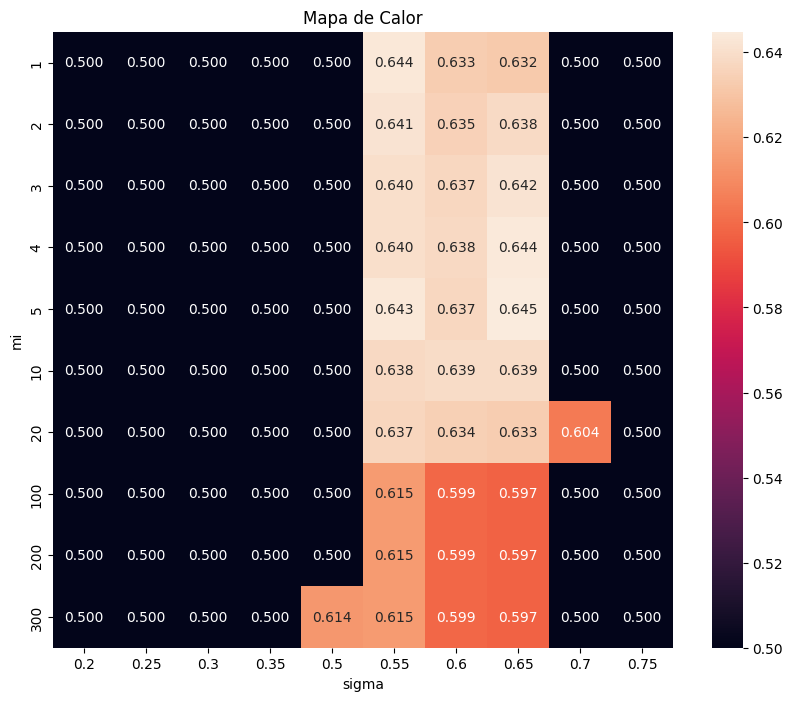

In [27]:
def plot_graph_cmaes(df, nom_x, nom_y):

    #eixo_x = np.trunc(df[nom_x] * 10) / 10.0
    #eixo_y = np.trunc(df[nom_y] * 10)/ 10.0
    fitness = df['best_ind']
    dict_grafico = {
        nom_x: df[nom_x].values,
        nom_y: df[nom_y].values,
        'fitness': fitness
    }

    df_filtrado = pd.DataFrame(dict_grafico)
    df_pivot = df_filtrado.pivot(values='fitness', index=nom_x, columns=[nom_y])

    # Ajustar o tamanho da figura para aumentar os quadrados
    plt.figure(figsize=(10, 8))  # Ajuste os valores conforme necessário
    sns.heatmap(data=df_pivot, annot=True, fmt=".3f")

    # Ajustar outros aspectos da visualização aqui, se necessário
    plt.title("Mapa de Calor")
    plt.ylabel(nom_x)
    plt.xlabel(nom_y)

    plt.show()


plot_graph_cmaes(df_sens_cmaes, 'mi', 'sigma')

In [ ]:
df_sens_cmaes_csv = df_sens_cmaes.copy(deep=True)
# Trunca até 3 casas decimais
df_sens_cmaes_csv['best_ind'] = df_sens_cmaes_csv['best_ind'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['avg_ind'] = df_sens_cmaes_csv['avg_ind'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['fitness_calls'] = df_sens_cmaes_csv['fitness_calls'].astype(int)
df_sens_cmaes_csv['total_time'] = df_sens_cmaes_csv['total_time'].apply(lambda x: round(x, 3))
df_sens_cmaes_csv['mi'] = df_sens_cmaes_csv['mi'].astype(int)
df_sens_cmaes_csv['sigma'] = df_sens_cmaes_csv['sigma'].apply(lambda x: round(x, 2))
df_sens_cmaes_csv.to_csv('processed_tables/cmaes_sensitivity.csv', index=False)



KeyError: 'mi'

In [ ]:
path = 'simulations/depso_sensitivity.json'
parameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']
viz = SensVisualizer(file_path=path, parameters=parameters)
viz.display_all()
df_sens_depso = viz.df_sens

Tabela de sensibilidade:


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
0,3.5,1.0,5.5,0.2,0.5,0.5,0.500000,39.0,243.981200
1,3.5,1.0,5.5,0.2,0.7,0.5,0.500000,39.0,244.143023
2,3.5,1.0,5.5,0.2,0.9,0.5,0.500000,39.0,243.969531
3,3.5,1.0,5.5,0.2,1.0,0.5,0.500000,39.0,244.689338
4,3.5,1.0,5.5,0.4,0.5,0.5,0.500000,39.0,243.516384
...,...,...,...,...,...,...,...,...,...
283,3.5,3.5,10.0,0.6,1.0,0.5,0.500000,61.0,250.792300
284,3.5,3.5,10.0,0.8,0.5,0.5,0.499625,61.0,254.763209
285,3.5,3.5,10.0,0.8,0.7,0.5,0.499625,61.0,253.491396
286,3.5,3.5,10.0,0.8,0.9,0.5,0.500000,79.0,252.127671


Melhor indivíduo


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
111,3.5,2.25,5.5,0.8,1.0,0.649935,0.542295,101.0,231.413352


Melhor indivíduo médio


,global_factor,local_factor,v_max,mutation_rate,crossover_rate,best_ind,avg_ind,fitness_calls,total_time
99,3.5,2.25,5.5,0.2,1.0,0.649506,0.620721,103.0,228.139822


Parâmetros
{'global_factor': array([3.5 , 2.25, 1.  ]), 'local_factor': array([1.  , 2.25, 3.5 ]), 'v_max': array([ 5.5 ,  7.75, 10.  ]), 'mutation_rate': array([0.2, 0.4, 0.6, 0.8]), 'crossover_rate': array([0.5, 0.7, 0.9, 1. ])}


#DEPSO

/tmp/ipykernel_1065329/1462218417.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'best_ind': 'fitness'}, inplace=True)
/tmp/ipykernel_1065329/1462218417.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Fitness Group'] = pd.cut(df['fitness'], intervalos, include_lowest=True, right=False)
/tmp/ipykernel_1065329/1462218417.py:25: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future defau

ValueError: x and y must have same first dimension, but have shapes (6,) and (7,)

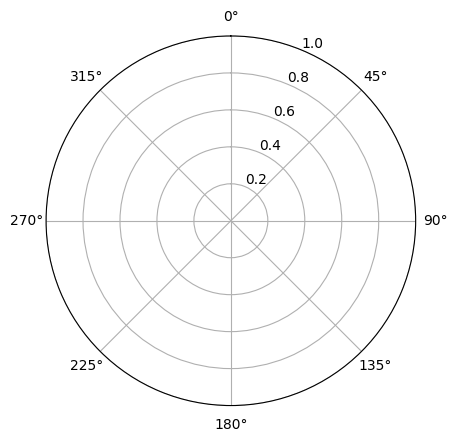

In [ ]:
# Faz a visualização do DEPSO utilizando um gráfico de radar, de modo a a que o valor de fitness fique no centro pois ele é o mais importante
# Os outros parâmetros ficam em volta do gráfico de radar, de modo a facilitar a visualização
# O gráfico de radar é feito com a biblioteca plotly
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from math import pi


def plot_graph_depso(df, nom_x, nom_y, nom_z, nom_u, nom_v):
    # Cria um gráfico de radar com os parâmetros passados a partir do dataframe df, sendo fitness o campo central
    # nom_x, nom_y, nom_z, nom_u e nom_v são os nomes dos campos do dataframe que serão utilizados
    # nom_x, nom_y, nom_z, nom_u e nom_v devem ser strings
    # df deve ser um dataframe
    
    # Filtra o dataframe
    df = df[[nom_x, nom_y, nom_z, nom_u, nom_v, 'best_ind']]
    df.rename(columns={'best_ind': 'fitness'}, inplace=True)

    # Cria intervalos de fitness
    intervalos = np.arange(0.5, 0.7, 0.1)
    df['Fitness Group'] = pd.cut(df['fitness'], intervalos, include_lowest=True, right=False)

    # Calcula a média para cada grupo
    grouped = df.groupby('Fitness Group').mean()

    # Número de variáveis
    categories = list(df.columns[:-2])
    N = len(categories)

    # Ângulos para os parâmetros
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

    # Inicializa o gráfico de radar
    ax = plt.subplot(111, polar=True)

    # Fecha o gráfico
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

    # Desenha um por um
    for i, row in grouped.iterrows():
        values = row.values.flatten().tolist()
        values += values[:1]
        ax.plot(angles, values, linewidth=1, linestyle='solid', label=f'Fitness {i}')

    # Adiciona atributos
    plt.xticks(angles[:-1], categories)
    plt.yticks([0.2, 0.4, 0.6, 0.8], ["0.2", "0.4", "0.6", "0.8"], color="grey", size=7)
    plt.ylim(0,1)

    # Adiciona legenda
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

    plt.show()
    

plot_graph_depso(df_sens_depso, 'global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate')
    

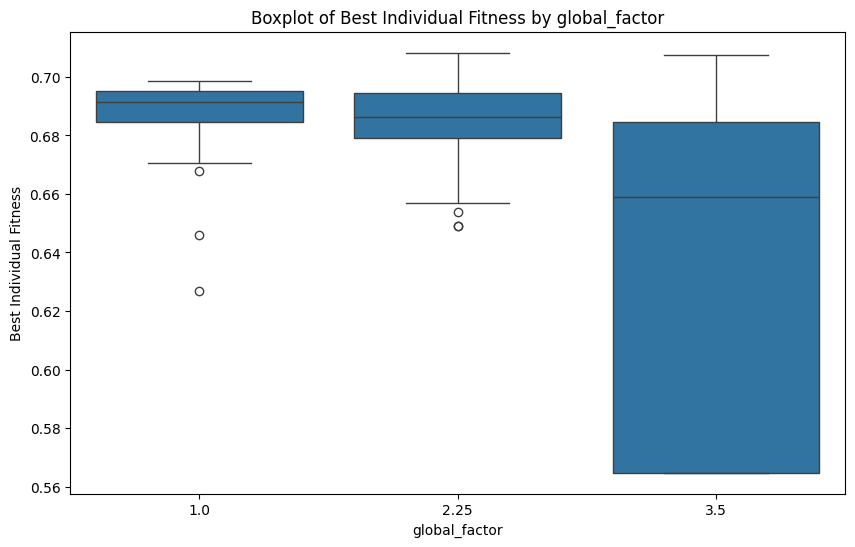

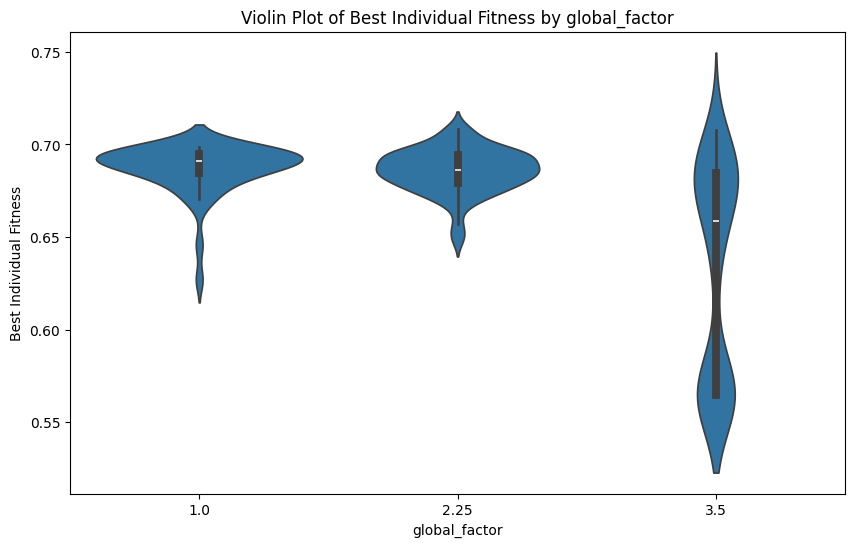

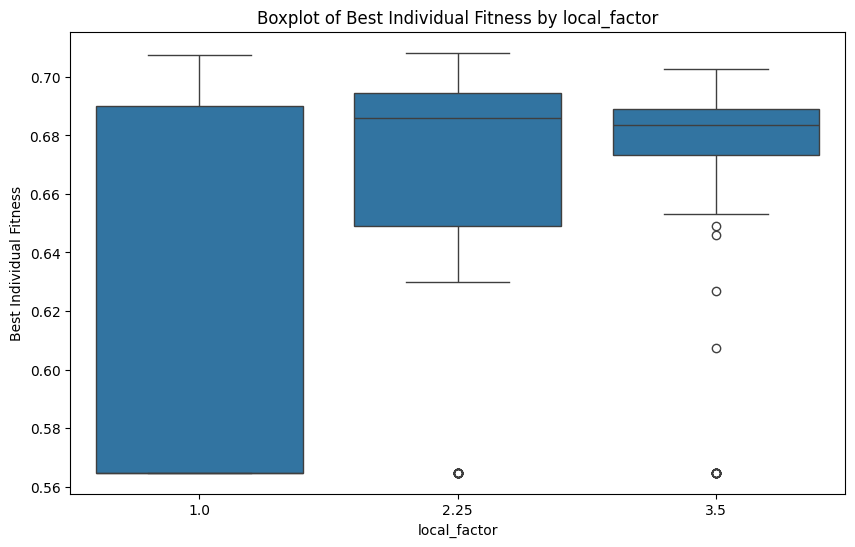

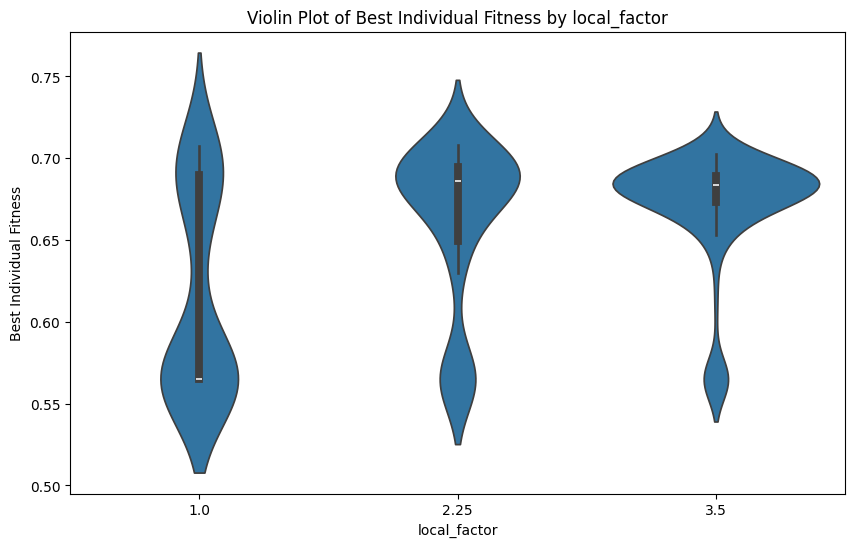

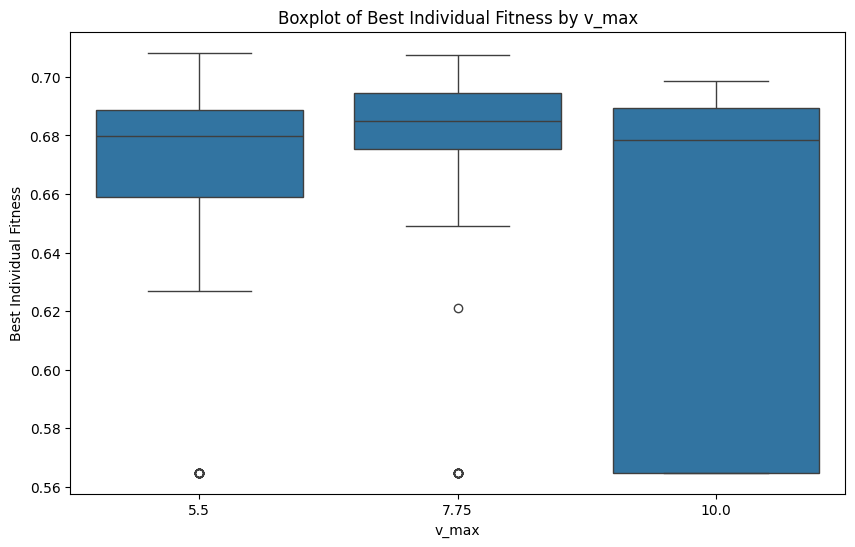

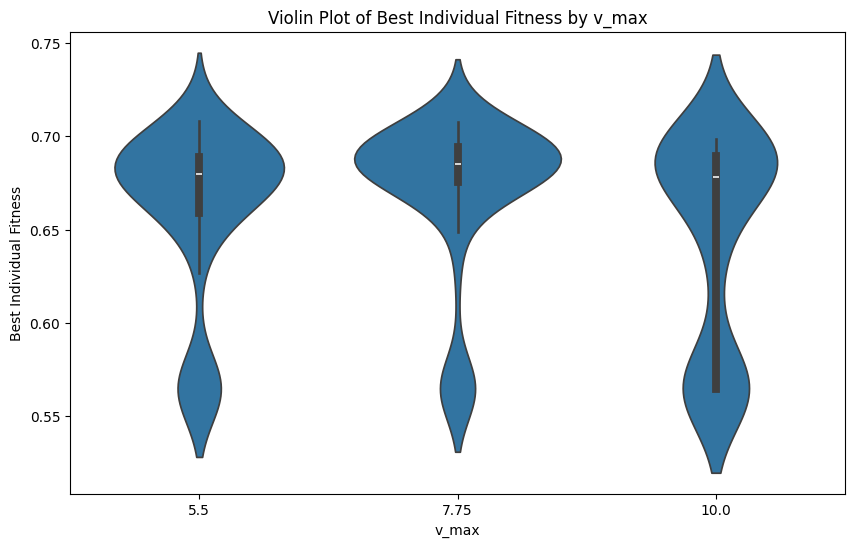

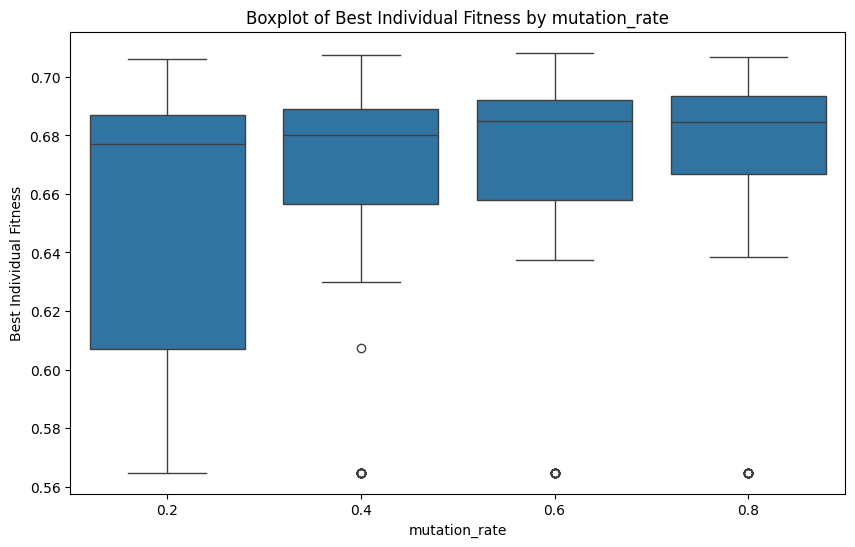

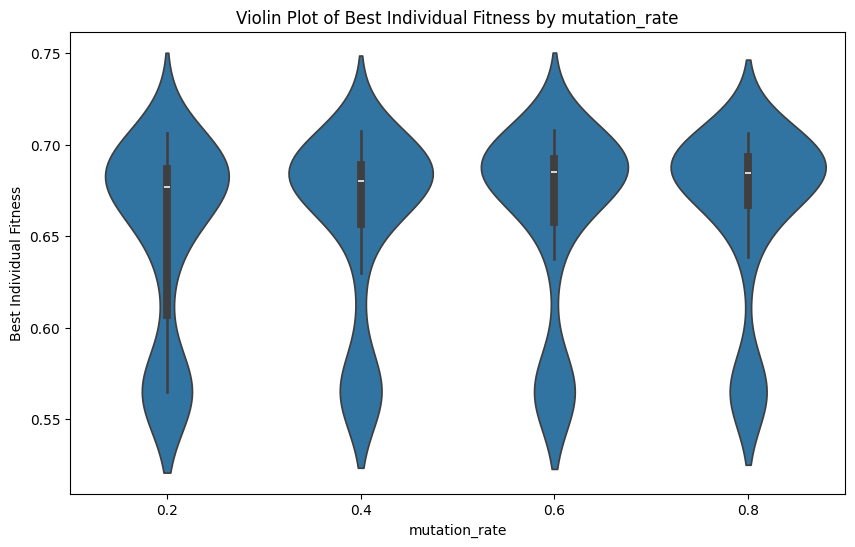

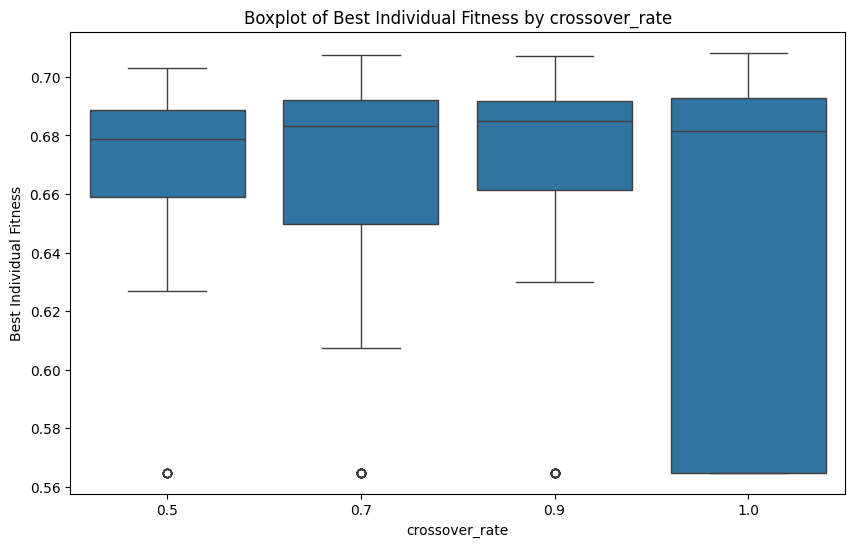

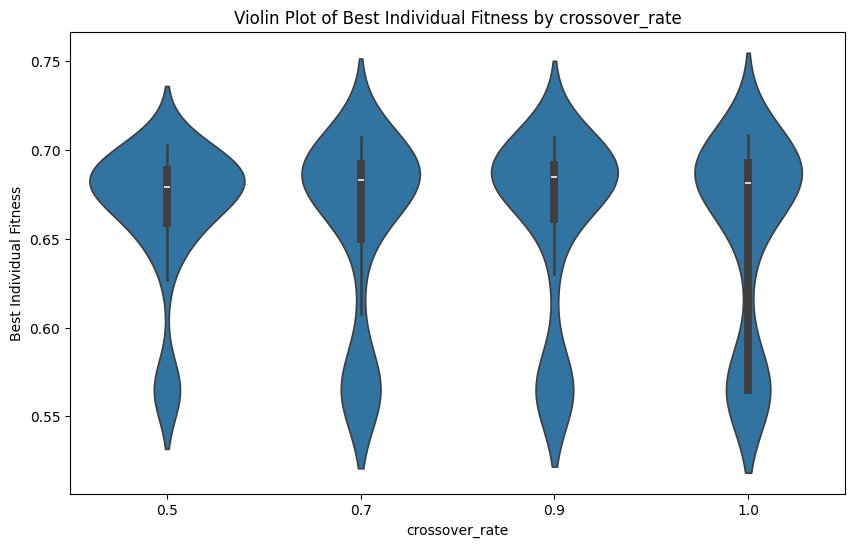

In [ ]:
df = df_sens_depso.copy(deep=True)

# Lista dos hiperparâmetros
hyperparameters = ['global_factor', 'local_factor', 'v_max', 'mutation_rate', 'crossover_rate']

# Criando boxplots e violin plots
for param in hyperparameters:
    # Boxplot
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=df[param], y=df['best_ind'])
    plt.title(f'Boxplot of Best Individual Fitness by {param}')
    plt.xlabel(param)
    plt.ylabel('Best Individual Fitness')
    plt.show()

    # Violin plot
    plt.figure(figsize=(10, 6))
    sns.violinplot(x=df[param], y=df['best_ind'])
    plt.title(f'Violin Plot of Best Individual Fitness by {param}')
    plt.xlabel(param)
    plt.ylabel('Best Individual Fitness')
    plt.show()


In [ ]:
import plotl

# opt-aiNet

In [ ]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_optainet_sens = read_json('simulations/optainet_new_sensitivity.json')

In [ ]:
# procura na lista qual dos itens (dicionário) possui um total_time maior que 0
for item in dict_optainet_sens:
    if item['total_time'] > 0:
        print(item)
        break

{'nc': 2, 'beta': 10.0, 'clone_threshold': 0.05, 'supression_threshold': 0.8, 'newcomers_percentage': 0.4, 'fitness_calls': [187.0, 389.0, 620.0, 894.0, 1176.0, 1448.0, 1673.0, 1995.0, 2322.0, 2648.0, 2912.0, 3204.0, 3558.0, 3904.0, 4232.0, 4551.0, 4936.0, 5250.0, 5524.0, 5748.0, 6035.0, 6328.0, 6587.0, 6872.0, 7203.0, 7572.0, 7894.0, 8203.0, 8528.0, 8860.0, 9209.0, 9543.0, 9905.0, 10246.0, 10614.0, 11063.0, 11468.0, 11886.0, 12271.0, 12696.0, 13086.0, 13401.0, 13699.0, 14022.0, 14331.0, 14665.0, 14962.0, 15277.0, 15624.0, 15950.0], 'best_ind_list': [0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5], 'avg_ind_list': [0.43333333333333335, 0.4444444444444444, 0.45454545454545453, 0.43478260869565216, 0.43478260869565216, 0.4318181818181818, 0.4230769230769231, 0.40384615384615385, 0.47916666

In [ ]:
# Lê o arquivo JSON
path = 'simulations/optainet_new_sensitivity.json'
parameters = ['nc', 'beta', 'clone_threshold', 'supression_threshold', 'newcomers_percentage']
viz_optainet = SensVisualizer(file_path=path, parameters=parameters)
viz_optainet.display_all()
df_sens_optainet = viz_optainet.df_sens

IndexError: too many indices for array: array is 0-dimensional, but 1 were indexed

In [ ]:
dict_optainet_sens

[{'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.1,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.2,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.4,
  'newcomers_percentage': 0.4,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.8,
  'newcomers_percentage': 0.1,
  'fitness_calls': 0,
  'best_ind_list': 0,
  'avg_ind_list': 0,
  'best_solutions': 0,
  'total_time': 0},
 {'nc': 2,
  'beta': 10.0,
  'clone_threshold': 0.05,
  'supression_threshold': 0.8,
  'newcomers_percen

In [ ]:
def read_json(file_path):
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data

dict_optainet_sens = read_json('simulations/optainet_new_sensitivity.json')

# printa tabela do opt-aiNet a partir do dicitonário

row_list = []

for line in dict_optainet_sens:
#line = dict_optainet_sens[50]

    nc = line['nc']
    beta = line['beta']
    clone_threshold = line['clone_threshold']
    supression_threshold = line['supression_threshold']
    newcomers_percentage = line['newcomers_percentage']

    fitness_calls = line['fitness_calls']
    best_ind = line['best_ind_list']
    avg_ind = line['avg_ind_list']
    total_time = line['total_time']

    best_fitness = 0

    # Caso best_ind for um inteiro, transforma em lista
    if isinstance(best_ind, int):
        best_ind = [best_ind]
    if isinstance(avg_ind, int):
        avg_ind = [avg_ind]
    if isinstance(fitness_calls, int):
        fitness_calls = [fitness_calls]

    for item in zip(fitness_calls, best_ind, avg_ind):
        if item[1] >= best_fitness:
            best_fitness = item[1]
            best_fitness_calls = item[0]
            best_avg_ind = item[2]

    dict_row = {
        'nc': nc,
        'beta': beta,
        'clone_threshold': clone_threshold,
        'supression_threshold': supression_threshold,
        'newcomers_percentage': newcomers_percentage,
        'fitness_calls': best_fitness_calls,
        'best_ind': best_fitness,
        'avg_ind': best_avg_ind,
        'total_time': total_time
    }

    row_list.append(dict_row)

df_optainet = pd.DataFrame(row_list)
df_optainet


,nc,beta,clone_threshold,supression_threshold,newcomers_percentage,fitness_calls,best_ind,avg_ind,total_time
0,2,10.0,0.05,0.4,0.1,0.0,0.0,0.000000,0.000000
1,2,10.0,0.05,0.4,0.2,0.0,0.0,0.000000,0.000000
2,2,10.0,0.05,0.4,0.4,0.0,0.0,0.000000,0.000000
3,2,10.0,0.05,0.8,0.1,0.0,0.0,0.000000,0.000000
4,2,10.0,0.05,0.8,0.2,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...
238,8,1000.0,0.30,0.8,0.2,207341.0,0.5,0.395833,195.510844
239,8,1000.0,0.30,0.8,0.4,256918.0,0.5,0.395349,243.617889
240,8,1000.0,0.30,2.0,0.1,0.0,0.0,0.000000,0.000000
241,8,1000.0,0.30,2.0,0.2,0.0,0.0,0.000000,0.000000


In [ ]:
df_optainet.loc[df_optainet['best_ind'] == df_optainet['best_ind'].max()]

,nc,beta,clone_threshold,supression_threshold,newcomers_percentage,fitness_calls,best_ind,avg_ind,total_time
32,4,10.0,0.05,0.8,0.4,23935.0,0.640783,0.469352,28.573372
41,4,10.0,0.15,0.8,0.4,23935.0,0.640783,0.469352,28.496261
50,4,10.0,0.30,0.8,0.4,23935.0,0.640783,0.469352,28.539498


,nc,beta,clone_threshold,supression_threshold,newcomers_percentage,fitness_calls,best_ind,avg_ind,total_time
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
238,False,False,False,False,False,False,False,False,False
239,False,False,False,False,False,False,False,False,False
240,False,False,False,False,False,False,False,False,False
241,False,False,False,False,False,False,False,False,False


In [ ]:
df_optainet_csv = df_optainet.copy(deep=True)
# Trunca até 3 casas decimais
df_optainet_csv['best_ind'] = df_optainet_csv['best_ind'].apply(lambda x: round(x, 3))
df_optainet_csv['avg_ind'] = df_optainet_csv['avg_ind'].apply(lambda x: round(x, 3))
df_optainet_csv['fitness_calls'] = df_optainet_csv['fitness_calls'].astype(int)
df_optainet_csv['total_time'] = df_optainet_csv['total_time'].apply(lambda x: round(x, 3))
df_optainet_csv['nc'] = df_optainet_csv['nc'].astype(int)
df_optainet_csv['beta'] = df_optainet_csv['beta'].astype(int)

df_optainet_csv['clone_threshold'] = df_optainet_csv['clone_threshold'].apply(lambda x: round(x, 2))

df_optainet_csv['supression_threshold'] = df_optainet_csv['supression_threshold'].apply(lambda x: round(x, 1))
df_optainet_csv['newcomers_percentage'] = df_optainet_csv['newcomers_percentage'].apply(lambda x: round(x, 1))

# No caso de clone_threshold for 3, trocar por 0.3
df_optainet_csv['clone_threshold'] = df_optainet_csv['clone_threshold'].apply(lambda x: 0.3 if x == 3 else x)
#df_optainet_csv
#df_optainet_csv.to_csv('processed_tables/opainet_sensitivity.csv', index=False)



In [ ]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.corr()['best_ind'].sort_values(ascending=False) 


best_ind                1.000000e+00
avg_ind                 9.953567e-01
total_time              7.289869e-01
fitness_calls           6.856675e-01
beta                    1.722457e-01
newcomers_percentage    1.179446e-01
clone_threshold         4.835363e-17
nc                     -7.869606e-02
supression_threshold   -2.165882e-01
Name: best_ind, dtype: float64

In [ ]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.loc[df_optainet_csv['total_time'] > 0].corr()['best_ind'].sort_values(ascending=False) 


best_ind                1.000000e+00
newcomers_percentage    2.637947e-01
avg_ind                 1.478243e-01
clone_threshold         2.116877e-17
nc                     -3.149704e-02
fitness_calls          -1.889086e-01
total_time             -1.985644e-01
beta                   -2.602090e-01
supression_threshold             NaN
Name: best_ind, dtype: float64

In [ ]:
# Calcula a correlacao entre os parâmetros e o melhor fitness
df_optainet_csv.loc[df_optainet_csv['total_time'] == 0].corr()['best_ind'].sort_values(ascending=False) 


nc                     NaN
beta                   NaN
clone_threshold        NaN
supression_threshold   NaN
newcomers_percentage   NaN
fitness_calls          NaN
best_ind               NaN
avg_ind                NaN
total_time             NaN
Name: best_ind, dtype: float64

In [ ]:
df_optainet_csv.mean(axis=0)

nc                          4.666667
beta                      370.000000
clone_threshold             0.166667
supression_threshold        1.066667
newcomers_percentage        0.233333
fitness_calls           20151.938272
best_ind                    0.119025
avg_ind                     0.105556
total_time                 20.243535
dtype: float64

In [ ]:
df_optainet_csv.loc[df_optainet['total_time'] == 0].mean(axis=0)

nc                        4.774194
beta                    325.000000
clone_threshold           0.166667
supression_threshold      1.148387
newcomers_percentage      0.225806
fitness_calls             0.000000
best_ind                  0.000000
avg_ind                   0.000000
total_time                0.000000
dtype: float64

In [ ]:
df_optainet_csv.loc[df_optainet['total_time'] > 0].mean(axis=0)

nc                          4.315789
beta                      516.842105
clone_threshold             0.166667
supression_threshold        0.800000
newcomers_percentage        0.257895
fitness_calls           85910.894737
best_ind                    0.507421
avg_ind                     0.450000
total_time                 86.301386
dtype: float64

In [ ]:
df_optainet_csv.loc[df_optainet['total_time'] > 0].shape

(82, 9)

In [ ]:
df_optainet_csv.loc[df_optainet['total_time'] == 0].shape

(161, 9)